# Inspecting the Pubmed Evolution Paper Dataset

_(Adapted from: Inspecting the dataset - [Luís F. Simões](mailto:luis.simoes@vu.nl).
Assignments added by J.E. Hoeksema, 2014-10-16.
Converted to Python 3 and minor changes by Tobias Kuhn, 2015-10-11.)_

*******

This notebook's purpose is to provide a basic illustration of how to handle data in the *"evolution"* dataset, as well as to provide some basic assignments about this dataset.

Note that you can run all of this code from a normal python or ipython shell, except for certain magic codes (marked with %) used for display within a notebook.

## Loading the dataset

In [1]:
import pickle, bz2

Summaries_file = 'evolution__Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/2/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword, rather than index.

In [2]:
from collections import namedtuple

paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [3]:
Summaries[23144668]

paper(title='Embodied artificial evolution: Artificial evolutionary systems in the 21st Century.', authors=['Eiben AE', 'Kernbach S', 'Haasdijk E'], year=2012, doi='10.1007/s12065-012-0071-x')

In [4]:
Summaries[23144668].title

'Embodied artificial evolution: Artificial evolutionary systems in the 21st Century.'

## Dataset statistics

Plotting relies on [matplotlib](http://matplotlib.org/), which you can download from [here](http://matplotlib.org/downloads.html) ([NumPy](http://www.numpy.org/) is also required, and can be downloaded [here](http://sourceforge.net/projects/numpy/files/NumPy/1.7.1/)).

In [5]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per year

Here, we will get information on how many papers in the dataset were published per year.

We'll be using the [Counter](http://docs.python.org/2/library/collections.html#collections.Counter) class to determine the number of papers per year.

In [6]:
paper_year = [ p.year for p in Summaries.values() ]

from collections import Counter

papers_per_year = sorted( Counter(paper_year).items() )
print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2005, 8945), (2006, 9615), (2007, 10332), (2008, 10766), (2009, 11965), (2010, 12256), (2011, 13089), (2012, 14418), (2013, 13735), (2014, 17)]


Filtering results, to obain only papers since 1950:

In [7]:
papers_per_year  = [
    (y,count)
    for (y,count) in papers_per_year
    if y >= 1950
    ]

years     = [ y     for (y,count) in papers_per_year ]
nr_papers = [ count for (y,count) in papers_per_year ]

print('Number of papers in the dataset published since 1950: %d.' % sum(nr_papers))

Number of papers in the dataset published since 1950: 204700.


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

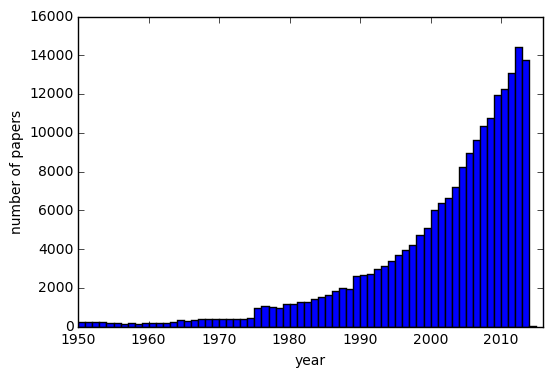

In [8]:
plt.bar( left=years, height=nr_papers, width=1.0 )

plt.xlim(1950,2016)
plt.xlabel( 'year' )
plt.ylabel( 'number of papers' );

### Papers per author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [9]:
# flattening out of the list of lists of authors
authors_expanded = [
    auth
    for paper in Summaries.values()
    for auth in paper.authors
    ]

nr_papers_by_author = Counter( authors_expanded )

In [10]:
print('There are %d authors in the dataset with distinct names.\n' % len(nr_papers_by_author))
print('50 authors with greatest number of papers:')
print(sorted( nr_papers_by_author.items(), key=lambda i:i[1] )[-50:])

There are 424178 authors in the dataset with distinct names.

50 authors with greatest number of papers:
[('Li S', 128), ('Yang F', 129), ('Wang C', 130), ('Wang Q', 131), ('Yang Z', 133), ('Filippi M', 134), ('Wang D', 134), ('Zhao Y', 135), ('Zhang W', 145), ('Wu J', 145), ('Li WH', 148), ('Li W', 148), ('Yang J', 149), ('Xu J', 150), ('Wang S', 154), ('Li C', 156), ('Holmes EC', 158), ('Chen H', 159), ('Liu H', 160), ('Zhang S', 160), ('Chen Z', 160), ('Yang Y', 161), ('Li Z', 162), ('Li L', 166), ('Wang W', 171), ('Liu Z', 176), ('Chen X', 178), ('Chen L', 192), ('Zhang H', 193), ('Chen J', 197), ('Chen Y', 203), ('Li H', 207), ('Wang Z', 227), ('Zhang Z', 234), ('Liu J', 234), ('Zhang L', 236), ('Wang H', 237), ('Liu X', 245), ('Koonin EV', 258), ('Li X', 269), ('Wang L', 281), ('Zhang X', 308), ('Liu Y', 312), ('Li J', 322), ('Zhang J', 385), ('Wang X', 388), ('Li Y', 421), ('Zhang Y', 439), ('Wang J', 447), ('Wang Y', 493)]


Creating a histogram to visualize the results (using [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)):

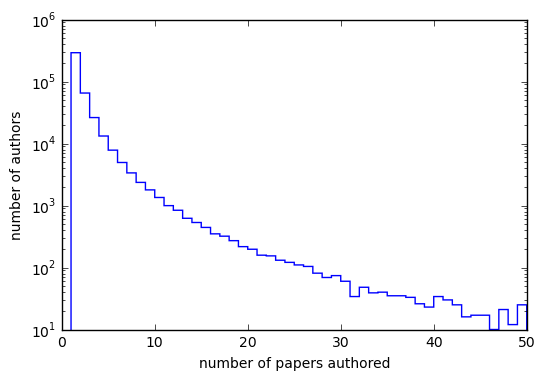

In [11]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), histtype='step' )
plt.yscale('log')
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per paper

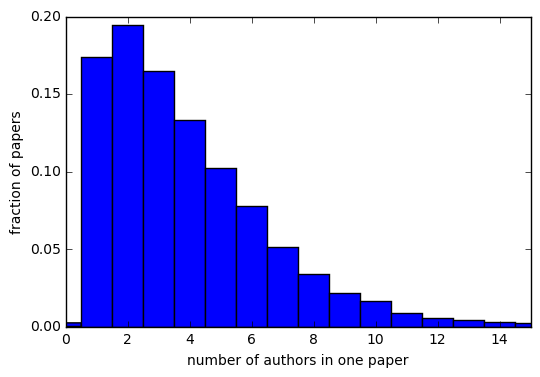

In [12]:
plt.hist( x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), histtype='bar', align='left', normed=True )
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(0,15);

### Most frequently occurring words in paper titles

In [13]:
# assemble list of words in paper titles, convert them to lowercase, and remove eventual trailing '.'
title_words = Counter([
    ( word if word[-1]!='.' else word[:-1] ).lower()
    for paper in Summaries.values()
    for word in paper.title.split(' ')
    if word != ''     # the split by spaces generates empty strings when consecutive spaces occur in the title; this discards them
    ])

In [14]:
print(len(title_words), 'distinct words occur in the paper titles.\n')
print('50 most frequently occurring words:')
print(sorted( title_words.items(), key=lambda i:i[1] )[-50:])

173567 distinct words occur in the paper titles.

50 most frequently occurring words:
[('evidence', 2772), ('species', 2883), ('system', 2896), ('case', 2899), ('selection', 3049), ('after', 3266), ('sequence', 3285), ('using', 3435), ('genome', 3460), ('role', 3473), ('expression', 3476), ('structure', 3562), ('virus', 3575), ('development', 3581), ('its', 3621), ('at', 3691), ('model', 3760), ('disease', 3806), ('dna', 3840), ('treatment', 3843), ('cell', 3930), ('between', 4012), ('is', 4040), ('clinical', 4069), ('new', 4453), ('genetic', 4524), ('as', 4791), ('patients', 4846), ('genes', 5206), ('protein', 5334), ('evolutionary', 5375), ('during', 5712), ('study', 6564), ('molecular', 6615), ('analysis', 7444), ('human', 7567), ('gene', 9413), ('an', 10208), ('by', 12108), ('from', 13426), ('on', 15139), ('with', 18920), ('to', 19582), ('for', 23210), ('a', 47248), ('evolution', 56638), ('in', 102207), ('and', 102717), ('the', 115120), ('of', 191677)]


# Assignments

- Create a plot that shows how many authors published at least one paper for each year after 1950  
  Hint: use a *defaultdict* with a default value of *set*. You can retrieve the number of unique items in a set `s` with `len(s)`. See also the documentation for [*set*](https://docs.python.org/2/library/stdtypes.html#set-types-set-frozenset) and [*defaultdict*](https://docs.python.org/2/library/collections.html#collections.defaultdict)

- Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent.

- While keeping in mind that we are dealing with a biased (preselected) dataset about evolution-related papers, do you notice a trend in the top 10 most frequent words?

_Please provide the answers to the assignment, together with the Python code used to answer them, through Blackboard. This can be either a modified version of this Notebook file with your answers included; or a PDF with graphs and code listings._